<a href="https://colab.research.google.com/github/vvrgit/Udemy-Oprimization-Basics/blob/main/MBGD_Case_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

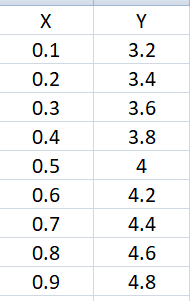

In [ ]:
import numpy as np
import pandas as pd
import random

In [ ]:
data=pd.read_excel("/content/SampleData - MBGD.xlsx")
data

,X,Y
0,0.1,3.2
1,0.2,3.4
2,0.3,3.6
3,0.4,3.8
4,0.5,4.0
5,0.6,4.2
6,0.7,4.4
7,0.8,4.6
8,0.9,4.8


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.X,data.Y,test_size=0.1,random_state=42)
y_test

,Y
7,4.6


In [ ]:
num_batches=2
X_train_batches = np.array_split(X_train, num_batches)
y_train_batches = np.array_split(y_train, num_batches)

print("Number of batches:", len(X_train_batches))
print("First batch of X_train:")
print(X_train_batches[0])
print("First batch of y_train:")
print(y_train_batches[0])

Number of batches: 2
First batch of X_train:
1    0.2
5    0.6
0    0.1
8    0.9
Name: X, dtype: float64
First batch of y_train:
1    3.4
5    4.2
0    3.2
8    4.8
Name: Y, dtype: float64


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
print("Number of batches:", len(X_train_batches))
print("Second batch of X_train:")
print(X_train_batches[1])
print("Secons batch of y_train:")
print(y_train_batches[1])

Number of batches: 2
Second batch of X_train:
2    0.3
4    0.5
3    0.4
6    0.7
Name: X, dtype: float64
Secons batch of y_train:
2    3.6
4    4.0
3    3.8
6    4.4
Name: Y, dtype: float64


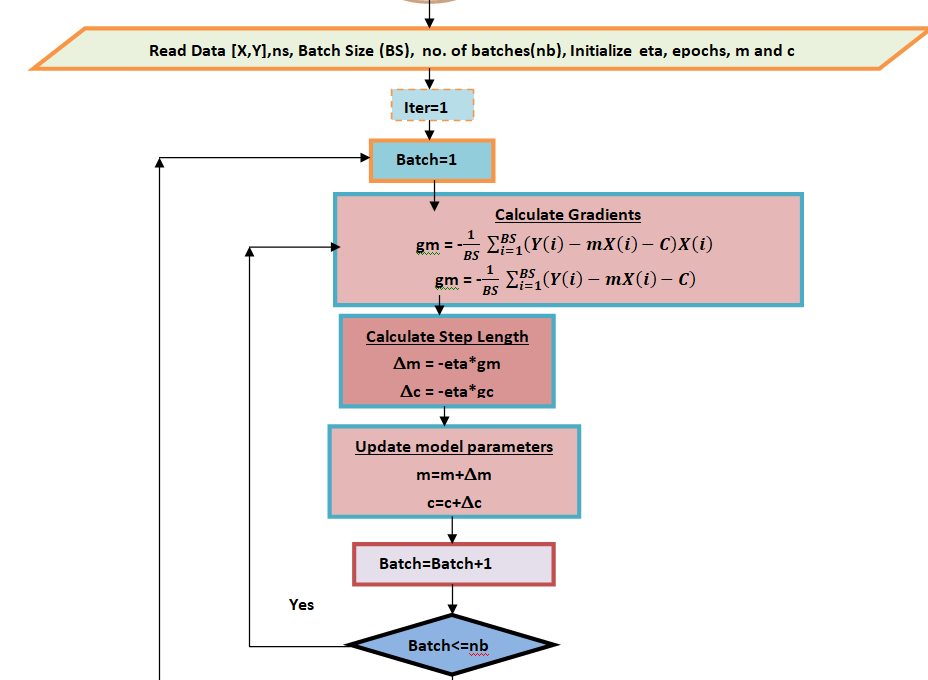

In [ ]:
eta=0.001
epochs=1000
m=random.uniform(-1,1)
c=random.uniform(-1,1)
nb=2
bs=X_train_batches[0].shape[0]

In [ ]:
for iter in range(epochs):
  for batch in range(nb):
    Gm=0
    Gc=0
    for sample in range(bs):
      Gm=Gm+(y_train_batches[batch].iloc[sample]-m*X_train_batches[batch].iloc[sample]-c)*X_train_batches[batch].iloc[sample]
      Gc=Gc+(y_train_batches[batch].iloc[sample]-m*X_train_batches[batch].iloc[sample]-c)
    gm=-Gm/bs
    gc=-Gc/bs
    delm=-eta*gm
    delc=-eta*gc
    m=m+delm
    c=c+delc
print("m=",round(m))
print("c=",round(c))

m= 2
c= 3


In [ ]:
#Training MSE
y_train_pred=m*X_train+c
mse=((y_train-y_train_pred)**2).mean()
print("MSE_Train=",mse)

MSE_Train= 0.0027811198296192677


In [ ]:
#Training MSE
y_test_pred=m*X_test+c
mse=((y_test-y_test_pred)**2).mean()
print("MSE_Test=",mse)

MSE_Test= 0.00756790064975925


In [ ]:
X=input("Enter the value of X")
X=float(X)
m=2
c=3
Y=m*X+c
print("Predicted Output Y = ", Y)

Enter the value of X0.9
Predicted Output Y =  4.8
